# **MetroPT-3 Dataset**
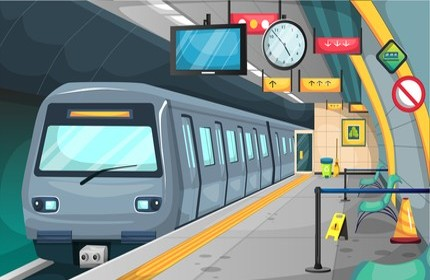

*From a metro train in an operational context, readings from pressure, temperature, motor current, and air intake valves were collected from a compressor's Air Production Unit (APU). This dataset reveals real predictive maintenance challenges encountered in the industry. It can be used for failure predictions, anomaly explanations, and other tasks.*

*It includes 15 signals, such as pressures, motor current, oil temperature, and electrical signals of air intake valves.*

In [54]:
import pandas as pd
import requests, zipfile, io

# URL of the dataset
url = 'https://archive.ics.uci.edu/static/public/791/metropt+3+dataset.zip'

# Download and unzip
response = requests.get(url)

with zipfile.ZipFile(io.BytesIO(response.content)) as zip_ref:
    # Extract and save the CSV to a local folder
    zip_ref.extractall('metropt3_dataset')  #Create a folder called "metropt3_dataset"


In [55]:
df = pd.read_csv('metropt3_dataset/MetroPT3(AirCompressor).csv')
print(df.head())

   Unnamed: 0            timestamp    TP2    TP3     H1  DV_pressure  \
0           0  2020-02-01 00:00:00 -0.012  9.358  9.340       -0.024   
1          10  2020-02-01 00:00:10 -0.014  9.348  9.332       -0.022   
2          20  2020-02-01 00:00:19 -0.012  9.338  9.322       -0.022   
3          30  2020-02-01 00:00:29 -0.012  9.328  9.312       -0.022   
4          40  2020-02-01 00:00:39 -0.012  9.318  9.302       -0.022   

   Reservoirs  Oil_temperature  Motor_current  COMP  DV_eletric  Towers  MPG  \
0       9.358           53.600         0.0400   1.0         0.0     1.0  1.0   
1       9.348           53.675         0.0400   1.0         0.0     1.0  1.0   
2       9.338           53.600         0.0425   1.0         0.0     1.0  1.0   
3       9.328           53.425         0.0400   1.0         0.0     1.0  1.0   
4       9.318           53.475         0.0400   1.0         0.0     1.0  1.0   

   LPS  Pressure_switch  Oil_level  Caudal_impulses  
0  0.0              1.0        1

Attribute Information:
The dataset consists of 1516948data points collected at 0.1Hz  from February to August 2020 and is described by 15 features from 7 analogue (1-7) and 8 digital (8-15) sensors:
1. TP2 (bar) – the measure of the pressure on the compressor.
2. TP3 (bar) – the measure of the pressure generated at the pneumatic panel.
3. H1 (bar) – the measure of the pressure generated due to pressure drop when the discharge of the cyclonic separator filter occurs.
4. DV pressure (bar) – the measure of the pressure drop generated when the towers discharge air dryers; a zero reading indicates that the compressor is operating under load.
5. Reservoirs (bar) – the measure of the downstream pressure of the reservoirs, which should be close to the pneumatic panel pressure (TP3).
6. Motor Current (A) –  the measure of the current of one phase of the three-phase motor; it presents values close to 0A - when it turns off, 4A - when working offloaded, 7A - when working under load, and 9A - when it starts working.
7. Oil Temperature (ºC) –  the measure of the oil temperature on the compressor.
8. COMP - the electrical signal of the air intake valve on the compressor; it is active when there is no air intake, indicating that the compressor is either turned off or operating in an offloaded state.
9. DV electric – the electrical signal that controls the compressor outlet valve; it is active when the compressor is functioning under load and inactive when the compressor is either off or operating in an offloaded state.
10. TOWERS – the electrical signal that defines the tower responsible for drying the air and the tower responsible for draining the humidity removed from the air; when not active, it indicates that tower one is functioning; when active, it indicates that tower two is in operation.
11. MPG – the electrical signal responsible for starting the compressor under load by activating the intake valve when the pressure in the air production unit (APU) falls below 8.2 bar; it activates the COMP sensor, which assumes the same behaviour as the MPG sensor.
12. LPS – the electrical signal that detects and activates when the pressure drops below 7 bars.
13. Pressure Switch - the electrical signal that detects the discharge in the air-drying towers.
14. Oil Level – the electrical signal that detects the oil level on the compressor; it is active when the oil is below the expected values.
15. Caudal Impulse – the electrical signal that counts the pulse outputs generated by the absolute amount of air flowing from the APU to the reservoirs.

In [56]:
df.shape

(1516948, 17)

In [57]:
df.columns

Index(['Unnamed: 0', 'timestamp', 'TP2', 'TP3', 'H1', 'DV_pressure',
       'Reservoirs', 'Oil_temperature', 'Motor_current', 'COMP', 'DV_eletric',
       'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level',
       'Caudal_impulses'],
      dtype='object')

In [58]:
df.drop(columns=["Unnamed: 0"],inplace=True)

In [59]:
df.drop(columns=["timestamp"],inplace=True)

In [60]:
df

,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
3,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
4,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516943,-0.014,8.918,8.906,-0.022,8.918,59.675,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1516944,-0.014,8.904,8.888,-0.020,8.904,59.600,0.0450,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1516945,-0.014,8.890,8.876,-0.022,8.892,59.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1516946,-0.012,8.876,8.864,-0.022,8.878,59.550,0.0450,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516948 entries, 0 to 1516947
Data columns (total 15 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   TP2              1516948 non-null  float64
 1   TP3              1516948 non-null  float64
 2   H1               1516948 non-null  float64
 3   DV_pressure      1516948 non-null  float64
 4   Reservoirs       1516948 non-null  float64
 5   Oil_temperature  1516948 non-null  float64
 6   Motor_current    1516948 non-null  float64
 7   COMP             1516948 non-null  float64
 8   DV_eletric       1516948 non-null  float64
 9   Towers           1516948 non-null  float64
 10  MPG              1516948 non-null  float64
 11  LPS              1516948 non-null  float64
 12  Pressure_switch  1516948 non-null  float64
 13  Oil_level        1516948 non-null  float64
 14  Caudal_impulses  1516948 non-null  float64
dtypes: float64(15)
memory usage: 173.6 MB


In [62]:
df.duplicated().sum()

np.int64(57475)

In [63]:
df.isnull().sum()

,0
TP2,0
TP3,0
H1,0
DV_pressure,0
Reservoirs,0
Oil_temperature,0
Motor_current,0
COMP,0
DV_eletric,0
Towers,0


In [64]:
df.describe()

,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
count,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06
mean,1.367826e+00,8.984611e+00,7.568155e+00,5.595619e-02,8.985233e+00,6.264418e+01,2.050171e+00,8.369568e-01,1.606106e-01,9.198483e-01,8.326640e-01,3.420025e-03,9.914368e-01,9.041556e-01,9.371066e-01
std,3.250930e+00,6.390951e-01,3.333200e+00,3.824015e-01,6.383070e-01,6.516261e+00,2.302053e+00,3.694052e-01,3.671716e-01,2.715280e-01,3.732757e-01,5.838091e-02,9.214078e-02,2.943779e-01,2.427712e-01
min,-3.200000e-02,7.300000e-01,-3.600000e-02,-3.200000e-02,7.120000e-01,1.540000e+01,2.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,-1.400000e-02,8.492000e+00,8.254000e+00,-2.200000e-02,8.494000e+00,5.777500e+01,4.000000e-02,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
50%,-1.200000e-02,8.960000e+00,8.784000e+00,-2.000000e-02,8.960000e+00,6.270000e+01,4.500000e-02,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
75%,-1.000000e-02,9.492000e+00,9.374000e+00,-1.800000e-02,9.492000e+00,6.725000e+01,3.807500e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
max,1.067600e+01,1.030200e+01,1.028800e+01,9.844000e+00,1.030000e+01,8.905000e+01,9.295000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [65]:
df.corr()

,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
TP2,1.000000,-0.011161,-0.961269,0.415025,-0.012403,0.250710,0.697480,-0.955521,0.947396,-0.616405,-0.941250,0.057651,-0.069532,0.013033,-0.010397
TP3,-0.011161,1.000000,0.224867,-0.153074,0.999993,0.401616,0.413756,0.103295,-0.078428,0.064937,0.088343,-0.324556,0.025240,-0.032829,-0.053179
H1,-0.961269,0.224867,1.000000,-0.425513,0.226037,-0.161810,-0.600178,0.971419,-0.958663,0.628964,0.954307,-0.133178,0.064769,-0.020691,-0.001900
DV_pressure,0.415025,-0.153074,-0.425513,1.000000,-0.153080,0.339697,0.302160,-0.423992,0.427813,-0.285256,-0.417284,0.011928,-0.088285,0.058520,0.042388
Reservoirs,-0.012403,0.999993,0.226037,-0.153080,1.000000,0.401647,0.412691,0.104509,-0.079640,0.065729,0.089555,-0.325235,0.025352,-0.032832,-0.052300
Oil_temperature,0.250710,0.401616,-0.161810,0.339697,0.401647,1.000000,0.528739,-0.233677,0.241678,-0.154531,-0.239154,-0.057989,-0.019560,-0.145239,-0.068120
Motor_current,0.697480,0.413756,-0.600178,0.302160,0.412691,0.528739,1.000000,-0.681326,0.689828,-0.439421,-0.683543,0.053664,-0.047003,-0.032793,-0.051145
COMP,-0.955521,0.103295,0.971419,-0.423992,0.104509,-0.233677,-0.681326,1.000000,-0.959307,0.668804,0.984555,-0.132727,0.183160,0.017974,0.050725
DV_eletric,0.947396,-0.078428,-0.958663,0.427813,-0.079640,0.241678,0.689828,-0.959307,1.000000,-0.607211,-0.975641,0.133922,0.014289,0.002478,-0.025202
Towers,-0.616405,0.064937,0.628964,-0.285256,0.065729,-0.154531,-0.439421,0.668804,-0.607211,1.000000,0.658474,-0.092452,0.262536,0.056029,0.087214


<Axes: >

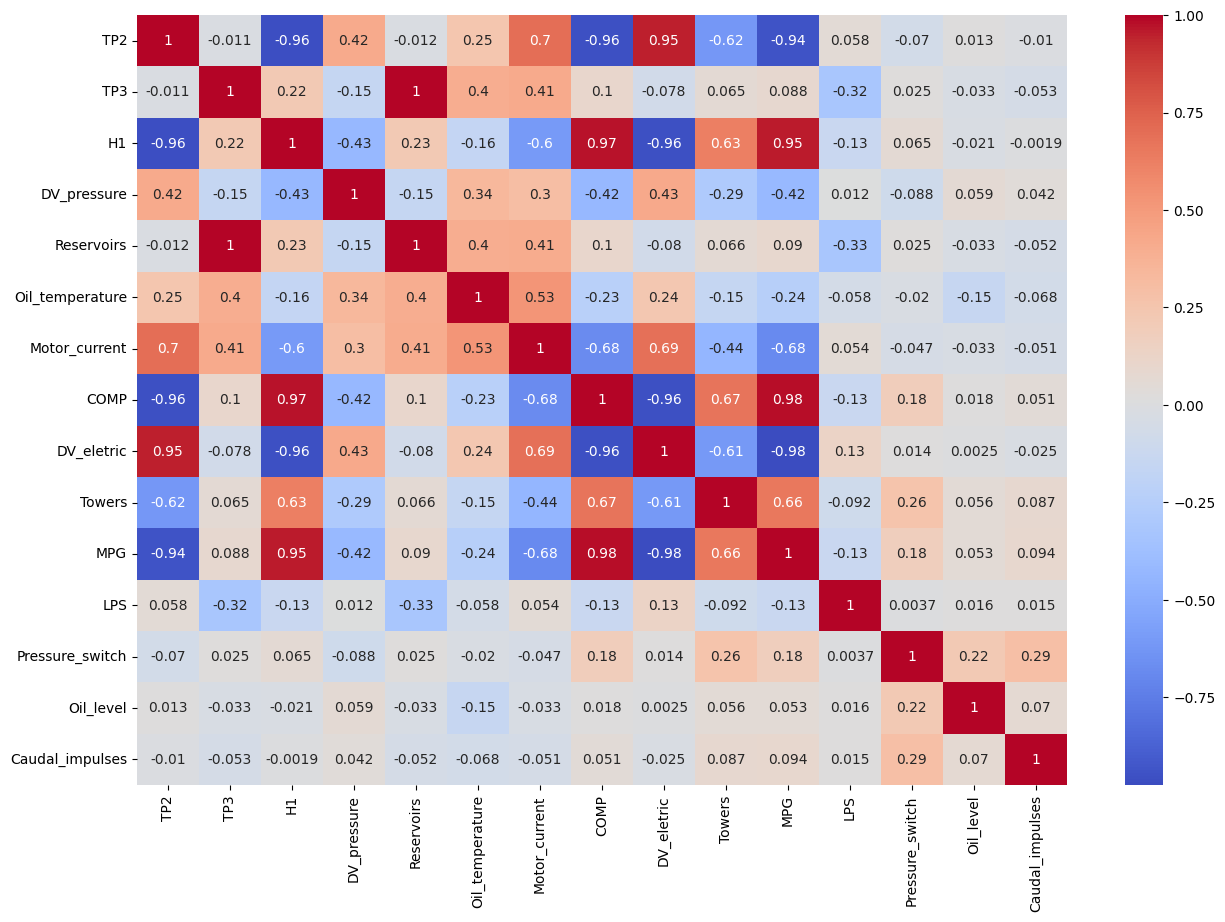

In [66]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

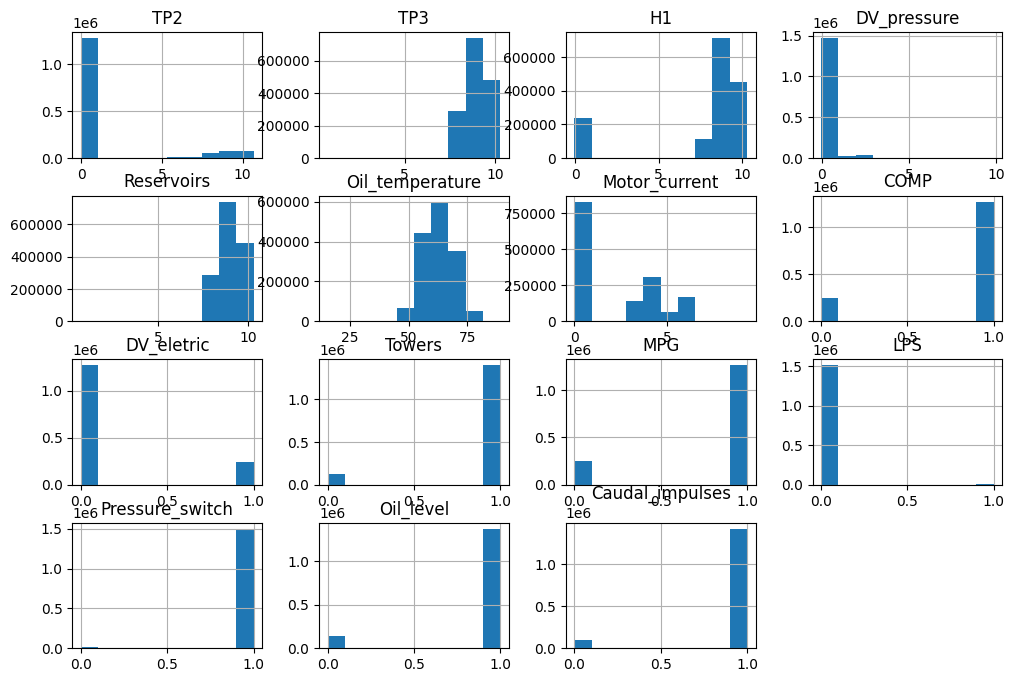

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df.hist(figsize=(12,8))
plt.show()

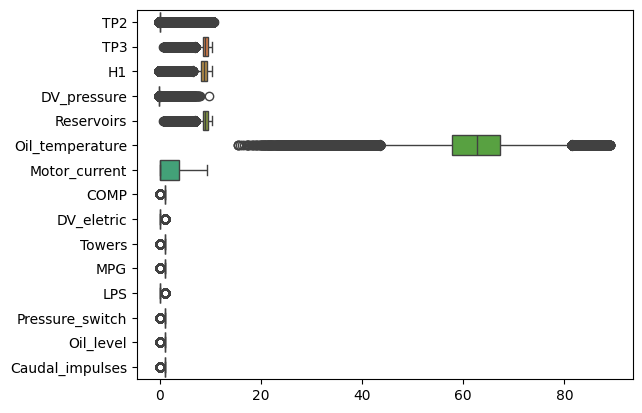

In [68]:
sns.boxplot(data=df, orient="h")
plt.show()

In [87]:
def get_operating_state(row):
    current = row['Motor_current']
    comp = row['COMP']
    dv = row['DV_eletric']

    if current < 1:
        return 0 #OFF
    elif current < 5 and comp == 1 and dv == 0:
        return 1 #NO LOAD
    elif current < 8 and comp == 0 and dv == 1:
        return 2 #LOAD
    elif current >= 8:
        return 3 #START
    else:
        return 4 #UNKNOWN

df['operating_state'] = df.apply(get_operating_state, axis=1)

In [81]:
df

,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,operating_state,is_running
0,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0,0
1,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0,0
2,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0,0
3,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0,0
4,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516943,-0.014,8.918,8.906,-0.022,8.918,59.675,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0,0
1516944,-0.014,8.904,8.888,-0.020,8.904,59.600,0.0450,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0,0
1516945,-0.014,8.890,8.876,-0.022,8.892,59.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0,0
1516946,-0.012,8.876,8.864,-0.022,8.878,59.550,0.0450,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0,0


In [83]:
df['operating_state'].value_counts()

,count
operating_state,
0,829000
1,440307
2,234996
4,12601
3,44


In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = df.drop(columns=['operating_state'])
X = X.select_dtypes(include='number')
y = df['operating_state']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    165830
           1       1.00      1.00      1.00     87998
           2       1.00      1.00      1.00     47076
           3       1.00      0.43      0.60         7
           4       1.00      0.99      1.00      2479

    accuracy                           1.00    303390
   macro avg       1.00      0.88      0.92    303390
weighted avg       1.00      1.00      1.00    303390



acc_score 0.9999110056363097

confusion_matrix [[165830      0      0      0      0]
 [     1  87988      0      0      9]
 [     0      0  47076      0      0]
 [     0      0      3      3      1]
 [     0     10      3      0   2466]]

ConfusionMatrixDisplay <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7b8fd84a5e10>


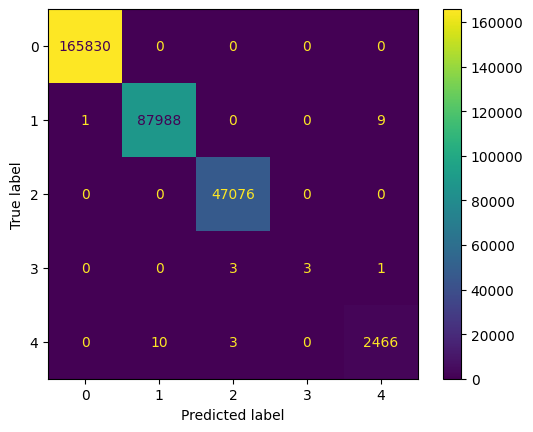

In [85]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score,precision_score, recall_score,f1_score,confusion_matrix,ConfusionMatrixDisplay
accuracy = accuracy_score(y_test, y_pred)

print('acc_score',accuracy_score(y_test,y_pred))
print()
print('confusion_matrix',confusion_matrix(y_test,y_pred))
print()
print('ConfusionMatrixDisplay',ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot())
plt.show()

*0 = Off*

*1 = No load*

*2 = Load*

*3 = Start*

*4 = Unknown*

In [86]:
X_train.shape, y_train.shape

((1213558, 16), (1213558,))

In [88]:
import pickle

pickle.dump(model, open('model_metro.pkl', 'wb'))